# Graph Lab

## Header information:

  - Author #1: Nivetha Kuruparan (kuruparn@mcmaster.ca)
  - Author #2: Tanveer Brar (brart5@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/brart5/l1-graph-lab
  - Avenue to Learn group name: 31

Calling the metric extractor to retrieve the data from the csv files.

In [1]:
from Python.src.metrics_extractor import *

stations_list = extract_data('_dataset/london.stations.csv')
lines_list = extract_data('_dataset/london.lines.csv')
connections_list = extract_data('_dataset/london.connections.csv')

Creating the graph from the data.
Computing the number of nodes (stations), the number of edges (connections), and the average degree of all the nodes in the graph.

In [2]:
from Python.src.graph import *

g = Graph(stations_list, lines_list, connections_list)

print("\nNumber of Stations:", g.num_stations)

print("Number of Connections:", int(g.num_connections / 2))
print("\tUndirected Graph (multiplied edges by 2):", g.num_connections)

print("Average Degree of Nodes:", round(g.average_degree(), 2))


Number of Stations: 302
Number of Connections: 406
	Undirected Graph (multiplied edges by 2): 812
Average Degree of Nodes: 2.69


Drawing the distribution of node’s degree.

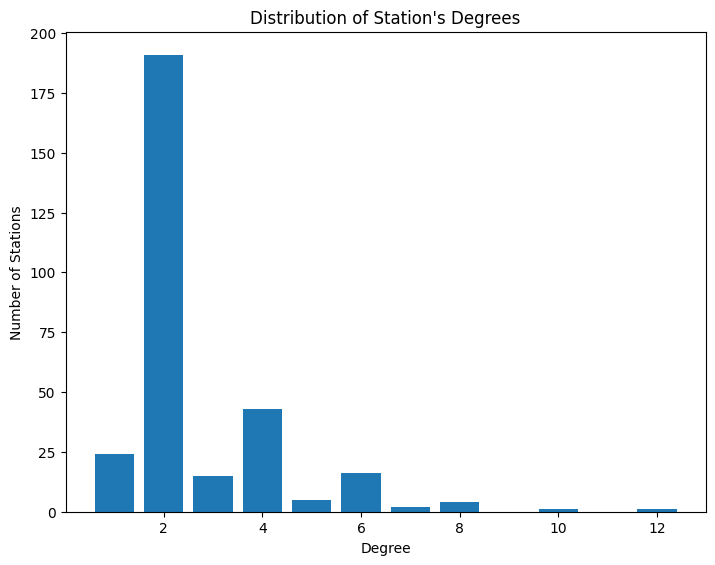

In [3]:
import matplotlib.pyplot as matplot

degrees, frequencies = g.degree_frequency()

sheet = matplot.figure()

bar_graph = sheet.add_axes([0,0,1,1])
bar_graph.bar(degrees, frequencies)
bar_graph.set_ylabel('Number of Stations')
bar_graph.set_xlabel('Degree')
bar_graph.set_title("Distribution of Station's Degrees")

matplot.show()

Designing the Itinerary Structure.

In [4]:
from Python.src.itinerary import *

Itinerary(g.connections, '11', '22') # Case 1: Best Possible Path (Least time AND Least Stations) + Alternative Routes
Itinerary(g.connections, '11', '200') # Case 2: Two Possible Paths (One with least time + One with least stations)
Itinerary(g.connections, '11', '400') # Case 3: Station does not exsit
Itinerary(g.connections, '11', '193') # Case 4: Two Possible Paths + Alternative Routs

ModuleNotFoundError: No module named 'src'

Write a benchmark to compare itinerary finding implementations.

In [ ]:
import Benchmarking.benchmark_kpi as benchmark_kpi

benchmark_kpi.main()

In [ ]:
# Unable to run pyperf Runner instance in jupyter notebook. 
# Please check below for console output of run done in vs_code terminal.

import Benchmarking.benchmark_time as benchmark_time

# benchmark_time.main()

# Benchmarking Report 
## Benchmark to Compare Itinerary Finding Algorithms

* Right KPIs to measure 
After carefully analysing our itinerary algorithms, it was clear that they use a lot of comparison operations(when trying to find the lower weight) and data accesses(when accessing information from the graph). This is why our benchmark includes Number of Comparisons and Number of Data Accesses for each algorithm. The benchmark also includes execution time for the algorithms to access the performance at different workloads. 

* right cases(itineraries) to consider for this benchmark 
Two KPIs, number of comparisons and number of data accesses are measured against path requests of different lengths. Each path request contains numerous station pairs that are randomly generated. The length of a request ranges between 10 and 100. In essence, the benchmark measures these performance indicators as if the itinerary is being accessed multiple times with a variable number of requests. 

Since the amount of path requests and the number of routes requested in these requested was already benchmarked for the two KPIs above, we decided to bench the execution time against variable station degree. That is, how is the execution time impacted when requesting a route where the starting station has multiple stations connected to it. The more the connected stations, the longer the algorithm should take because the algorithms analyze all paths before choosing the one with least weight. Data for this benchmark was also randomly generated, the maximum and minimum degrees are extracted for a given group of CSV files and a starting station and test destination is randomly chosen for each degree ranging between the maximum and minimum. 

## Class Diagram 
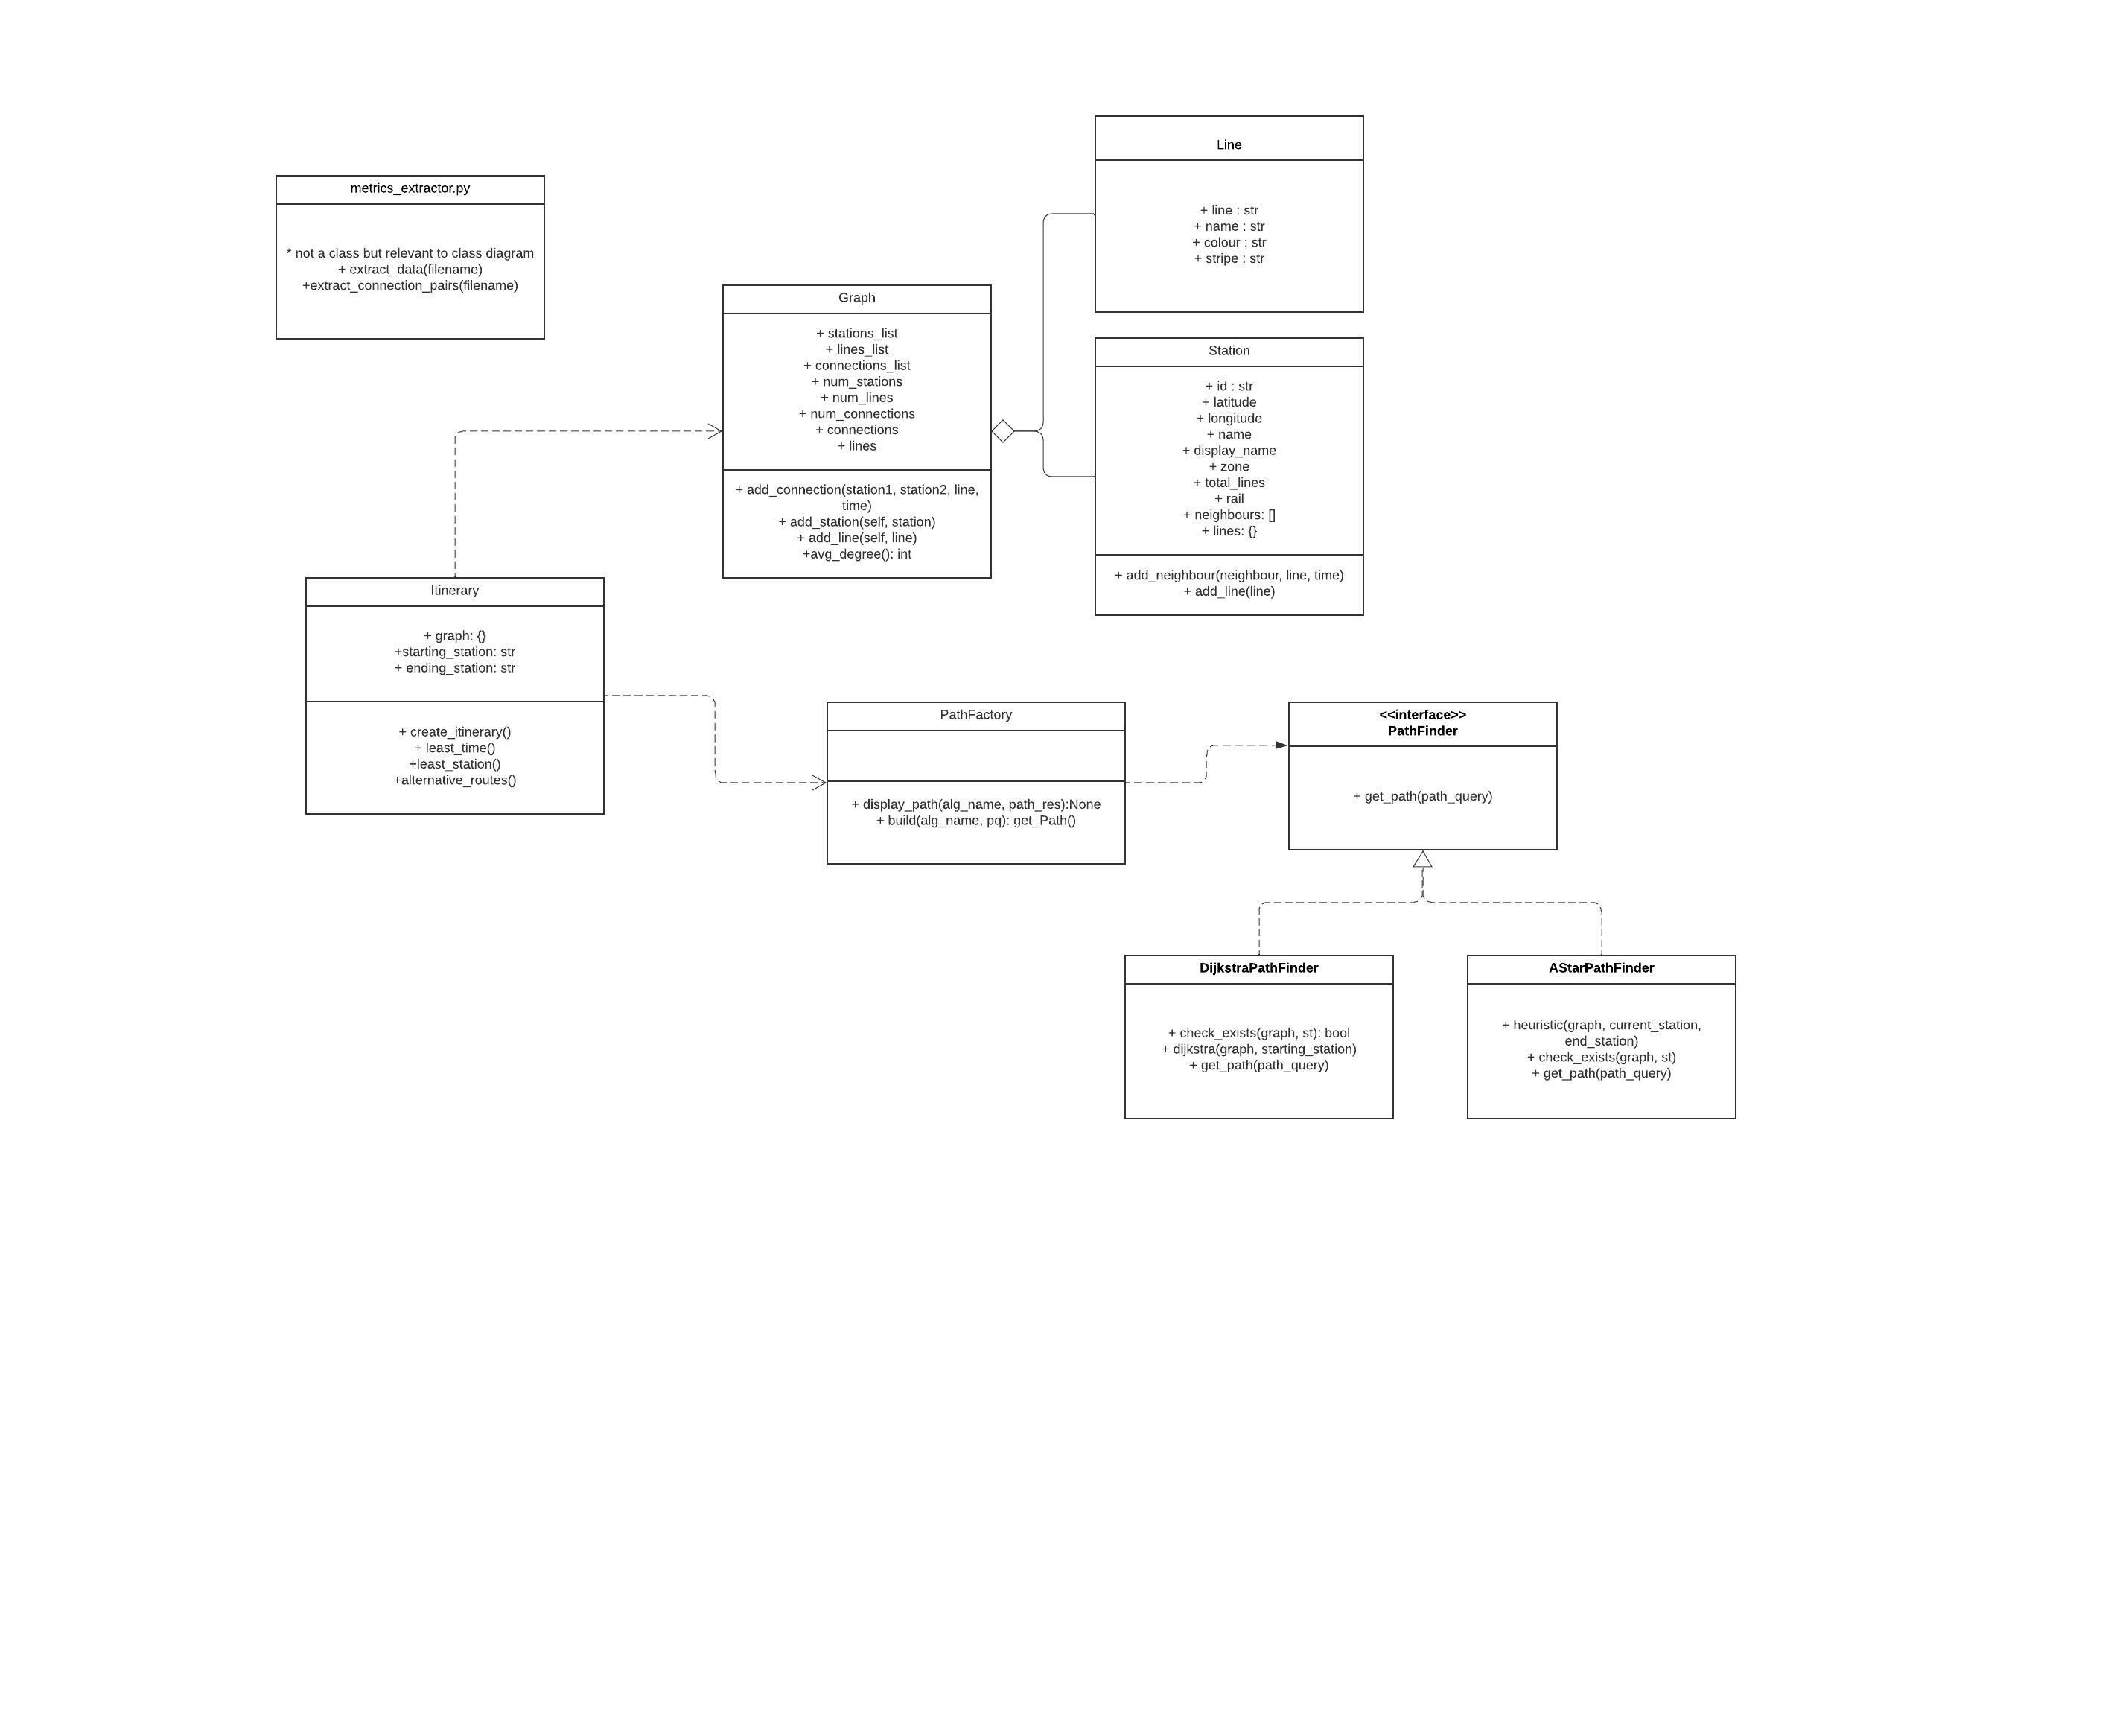



## Design Choices Justification
    * The design is heavily influenced by S(Single Responsibility) and O(Open Closed Principle) in SOLID. After carefully reviewing the instructions, the goal was to create dedicated classes that focus on single responsbility. The following elements illustrate this:
        * Individual stations and connecting lines between them each are defined by classes Station and Line. If an algorithm needs to access a station, it can just reference an instance of the Station class. Since the dataset is pretty vast and there is a possibility for a larger dataset as well, individual Station and Line classes reduce a lot of complexity. For each Station instance, it is easy to access information about its connections(neighbouring station, connecting line and time) which are stored in a list of tuples. 
        * Instead of having a dictionary or list define the graph data structure, a dedicated Graph class is created. In addition to storing different stations objects as dictionary value, it is easy to extract common metrics such as the average degree, number of stations and number of lines which are all attributes of a Graph instance. 
        * To avoid the dependency on the original dataset and abstract the actual working of the project from the input, a metrics extractor module is used that taken the route to a CSV file as input and returns a list containing the information from each line. 
        * To help the Itinerary easily chose the type of path finder algorithm, a factory design pattern was chosen. Any one of the path finder algorithms can be chosen to find a path between two stations depending on whether less time or less number of stops is requested. This design also makes it easy to add other path finder algorithms in the future by simply extending the PathFinder without having to change the existing classes, therefore enforcing the open closed principle. 

   
   
## Benchmark Results 

### Benchmark Results for Number of Comparisons and Number of Data Accesses




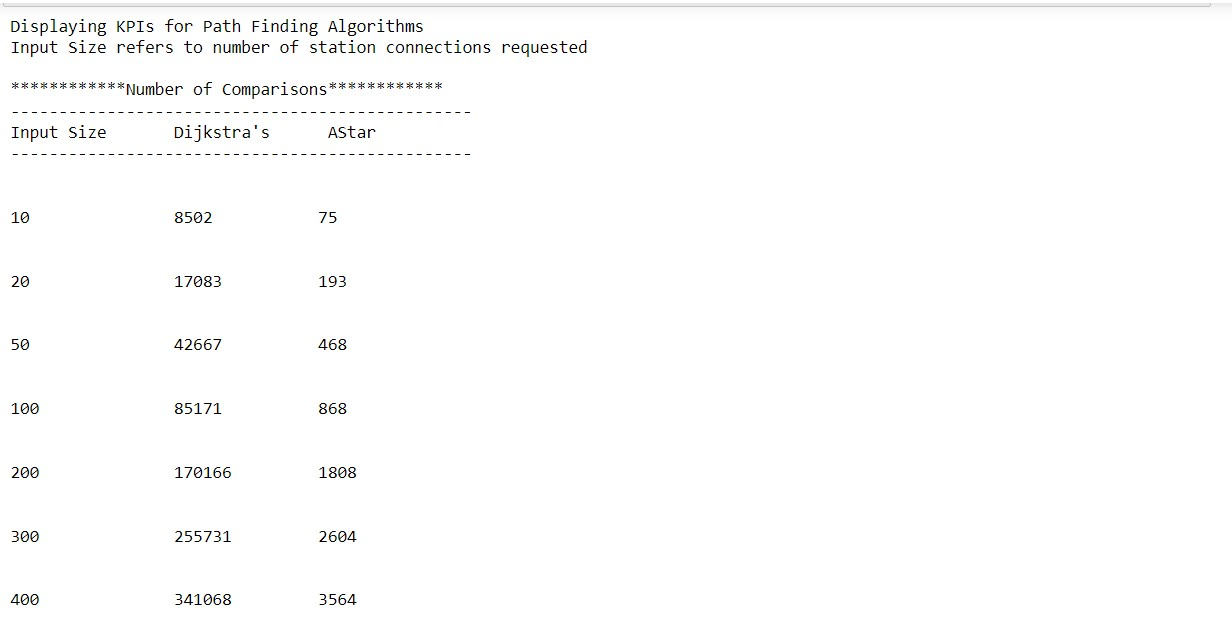

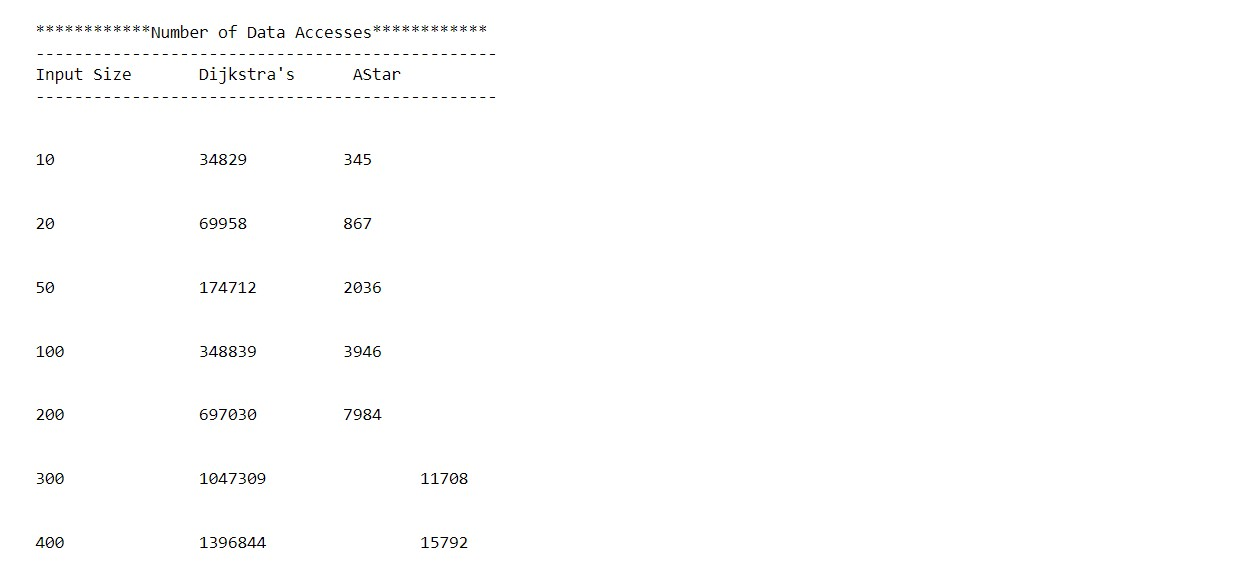

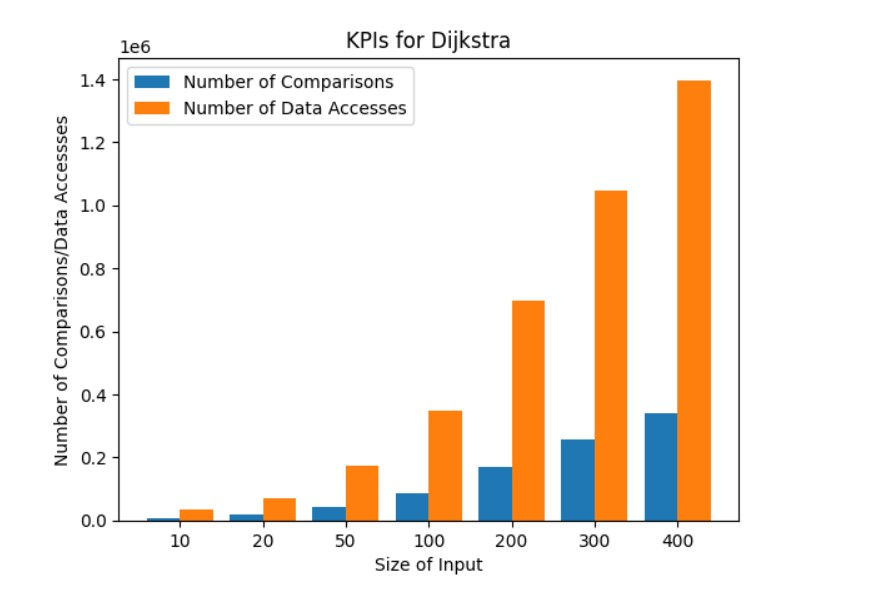

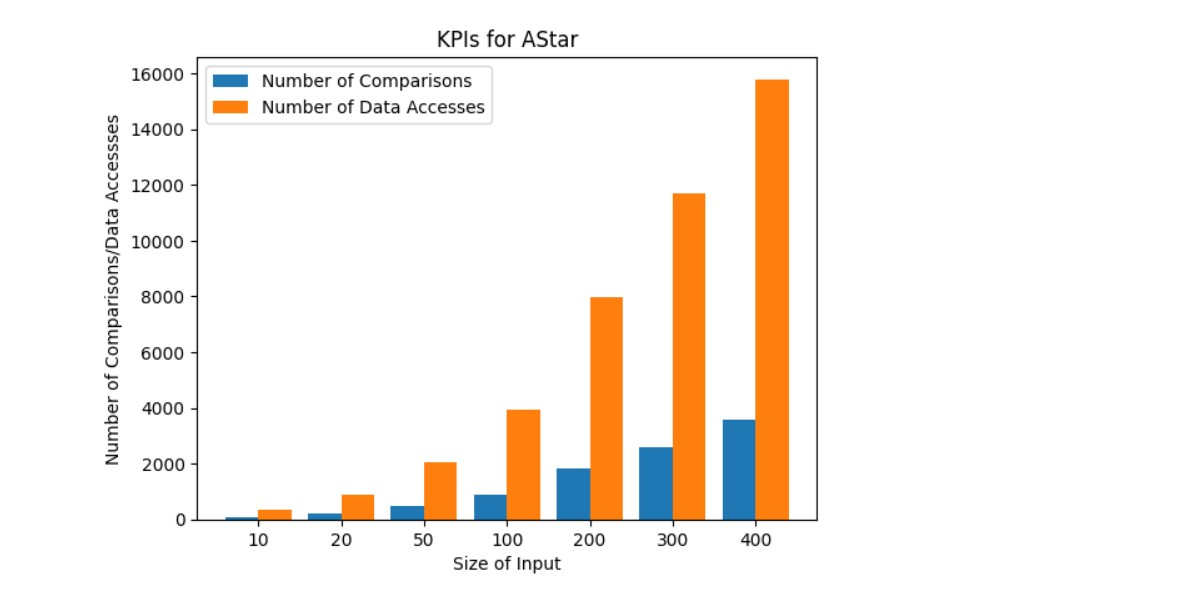

#### KPI Comparison for Dijkstra vs AStar

Both KPIs for Dijkstra and AStar show the same trend, the values for AStar algorithm are much lower than those for the Dijkstra algorithm. This is not suprising as while Dijkstra's algorithm depends only on the weight between two edges, AStar algorithm taken into account as extra quantity, which is the heuristic. In this project, the heuristic distance between any two stations on the graph is the shortest distance between them based on the geographical positions(latitude and longitude). This makes AStar algorithm have a brain/memory:  as it needs less comparisons and data accessses compared to Dijkstra's which does not have a heuristic. 


### Benchmark Results for Execution Time



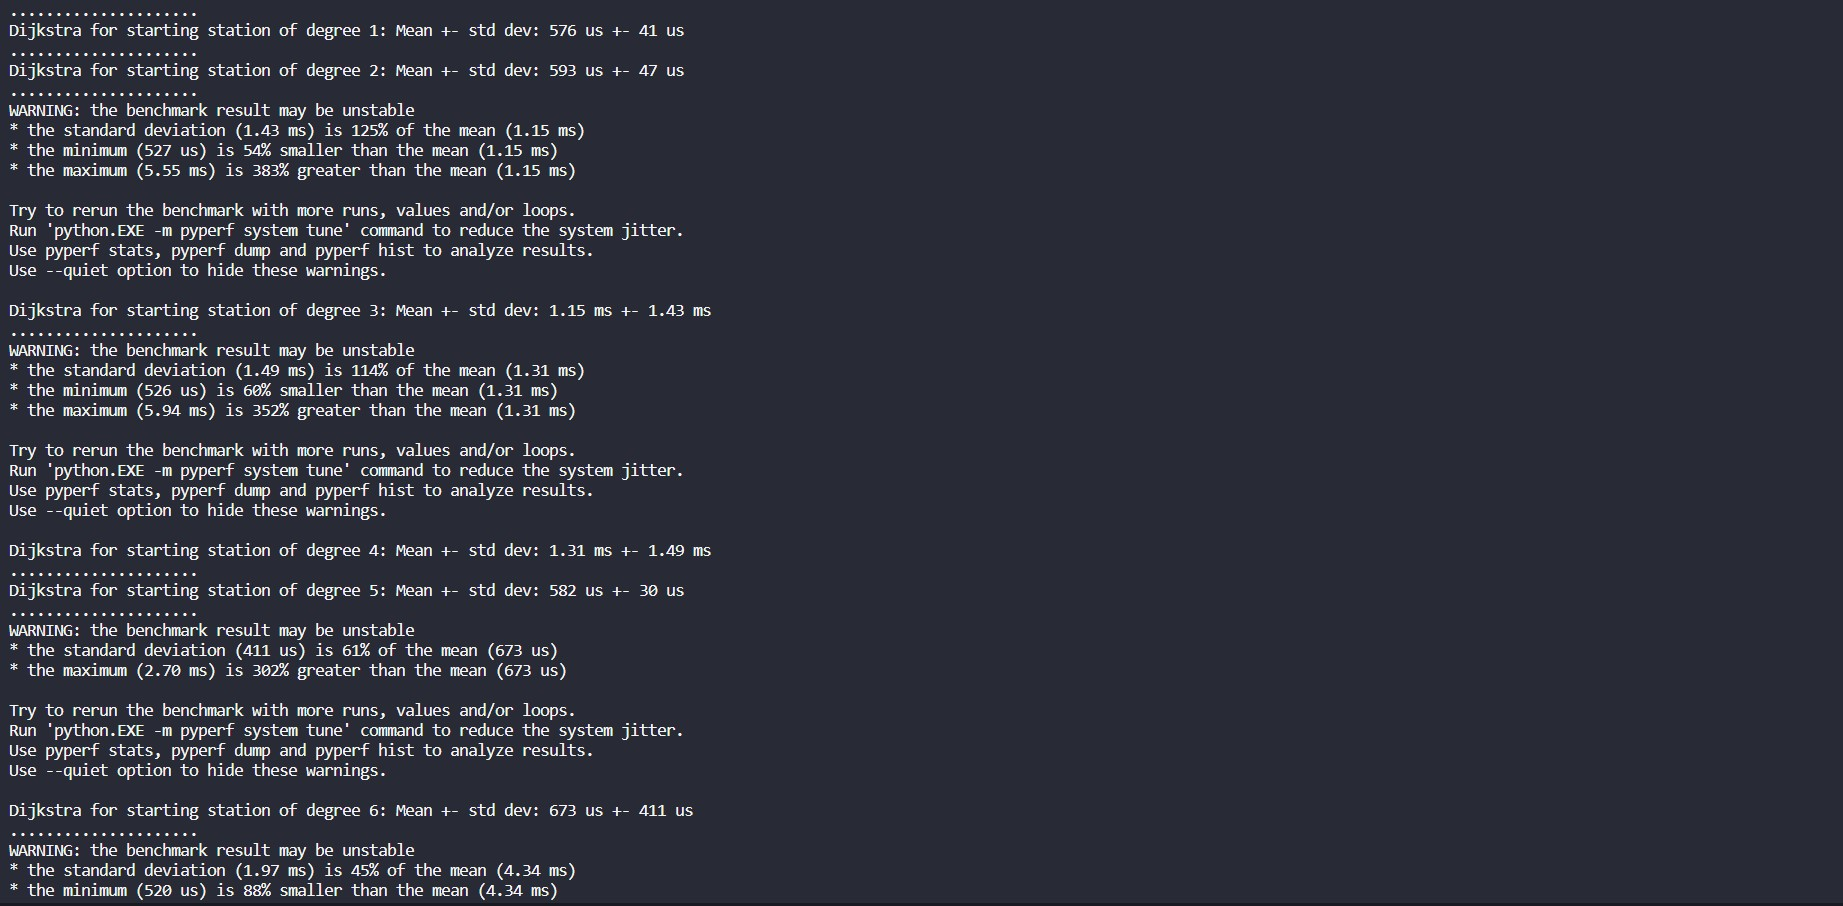

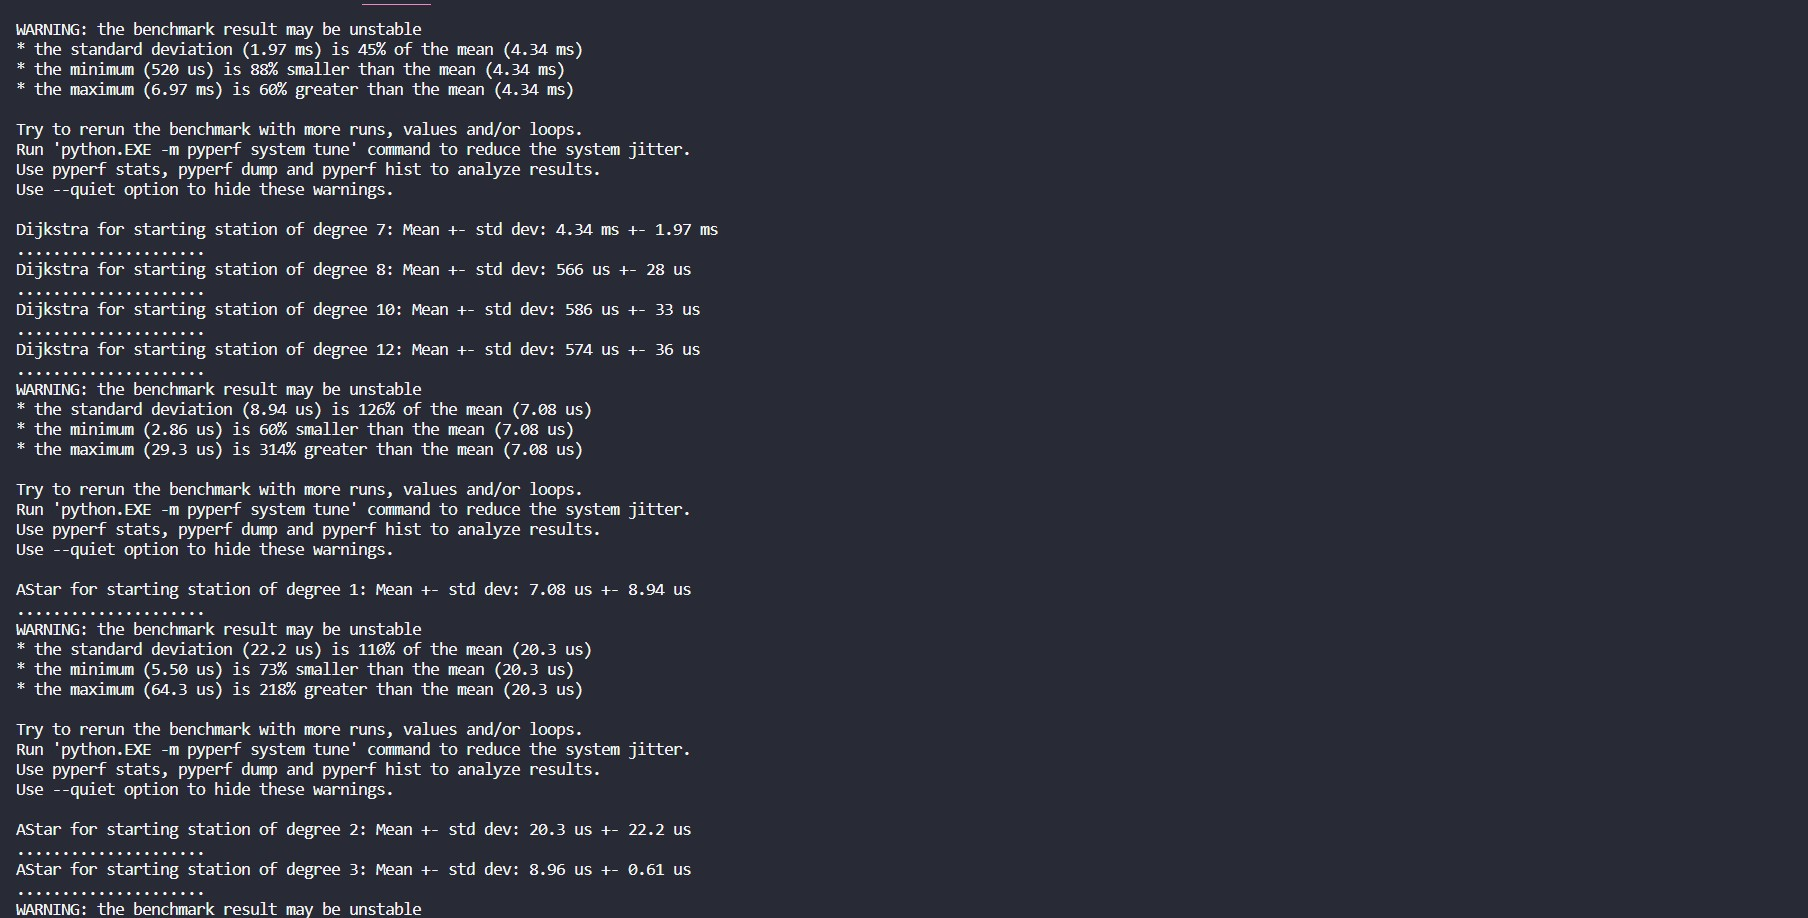

In [ ]:
Above are screenshots of the execution time tests done using pyperf. 

Notebook: The script could not be executed through Jupyter Notebook as it produced an error saying Runner instance cannot be created more than once although it was created exactly once for the class. The benchmark still works if ran on an IDE.

While the execution time of Dijkstra's algorithm ranges between 0.5 ms and 5 ms(approximate), the one for AStar is signifincantly lower, most of the benchmarks producing a time around 30 micro seconds(note that all tests were not covered in this screenshot). Again the results are not suprising and the explanation is the same as one above for the other KPIs. 

This goes to explain how adding a simple heuristic can simply boost the performance not only in terms of execution time but also KPIs such as number of data accesses.

## Individual Contributes

Nivetha: Dijkstra, Travelling Salesman, Urban Planning, Graph Data Structure
Tanveer: AStar, Graph Data Structure, Benchmarking, Testing, Justification Report

### Week 2

In [ ]:
from Python.src.subway_patrol_planning import *

SubwayPatrolPlanning(g.connections, ['11', '22', '33', '44', '55'])

In [ ]:
from Python.src.urbanism_planning import *

UrbanismPlanning(g.connections, g.get_all_zones())